<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-51/blob/main/M%C3%B3dulo_4_Actividad--4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np

#liga de dataset
payments= 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
#dataframe de payments
pay_df = pd.read_csv(payments,index_col='ID')
pay_df.columns=['CreditAmount','Gender','Education','MaritalStatus','Age','SeptemberRepayments','AugustRepayments','JulyRepayments','JuneRepayments','MayRepayments','AprilRepayments','SeptemberBillStatement','AugustBillStatement','JulyBillStatement','JuneBillStatement','MayBillStatement','AprilBillStatement','SeptemberPreviousPayment','AugustPreviousPayment','JulyPreviousPayment','JunePreviousPayment','MayPreviousPayment','AprilPreviousPayment','RealProbability']
#quitar valores vacios
pay_df.dropna(axis=0, inplace=True)
#mostrar primeras 5 filas
pay_df.head()

,CreditAmount,Gender,Education,MaritalStatus,Age,SeptemberRepayments,AugustRepayments,JulyRepayments,JuneRepayments,MayRepayments,...,JuneBillStatement,MayBillStatement,AprilBillStatement,SeptemberPreviousPayment,AugustPreviousPayment,JulyPreviousPayment,JunePreviousPayment,MayPreviousPayment,AprilPreviousPayment,RealProbability
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
#analizar cuales son las variables continuas
#revisar tipos de datos
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

In [53]:
#suma del total de variables con mismo prefijo y se agrega columna al dataframe
bill_statement=list(pay_df.loc[:,'SeptemberBillStatement':'AprilBillStatement'])
bill_statement
pay_df['totalBillStatement'] = pay_df[bill_statement].sum(axis=1)
pay_df['totalBillStatement']
#creación de lista con variables del mismo prefijo billstatement
bill_statement=list(pay_df.iloc[:,11:17])
bill_statement

ID
1          7704.0
2         17077.0
3        101653.0
4        231334.0
5        109339.0
           ...   
29996    725349.0
29997     21182.0
29998     70496.0
29999    266611.0
30000    230874.0
Name: totalBillStatement, Length: 29958, dtype: float64

In [59]:
#suma del total de variables con mismo prefijo y se agrega columna al dataframe
previous_payment=list(pay_df.loc[:,'SeptemberPreviousPayment':'AprilPreviousPayment'])
previous_payment
pay_df['totalPreviousPayment'] = pay_df[previous_payment].sum(axis=1)
pay_df['totalPreviousPayment']
#creación de lista con variables del mismo prefijo previouspayment
previous_payment=list(pay_df.iloc[:,11:17])
previous_payment

['SeptemberPreviousPayment',
 'AugustPreviousPayment',
 'JulyPreviousPayment',
 'JunePreviousPayment',
 'MayPreviousPayment',
 'AprilPreviousPayment']

In [55]:
#creación de lista con variables del mismo prefijo repayments
repayments=list(pay_df.iloc[:,5:11])
repayments
pay_df.head()

,CreditAmount,Gender,Education,MaritalStatus,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,SeptemberPreviousPayment,AugustPreviousPayment,JulyPreviousPayment,JunePreviousPayment,MayPreviousPayment,AprilPreviousPayment,RealProbability,totalPreviousPayment,totalBillStatement
ID,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,689.0,7704.0
2,120000,2.0,2.0,2.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,5000.0,17077.0
3,90000,2.0,2.0,2.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,11018.0,101653.0
4,50000,2.0,2.0,1.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,8388.0,231334.0
5,50000,1.0,2.0,1.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,59049.0,109339.0


In [ ]:
#eliminación de variables categóricas
pay_df=pay_df.drop(columns=repayments)

In [ ]:
#eliminación de variables categóricas
pay_df=pay_df.drop(columns=previous_payment)

In [63]:
pay_df.head()

,CreditAmount,Gender,Education,MaritalStatus,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,RealProbability,totalPreviousPayment,totalBillStatement
ID,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,1.0,689.0,7704.0
2,120000,2.0,2.0,2.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,1.0,5000.0,17077.0
3,90000,2.0,2.0,2.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,0.0,11018.0,101653.0
4,50000,2.0,2.0,1.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,0.0,8388.0,231334.0
5,50000,1.0,2.0,1.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,0.0,59049.0,109339.0


In [64]:
#eliminación de variables categóricas
pay_df=pay_df.drop(columns=['MaritalStatus','Education','Gender'])
pay_df.head()

,CreditAmount,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,RealProbability,totalPreviousPayment,totalBillStatement
ID,,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,1.0,689.0,7704.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,1.0,5000.0,17077.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,0.0,11018.0,101653.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,0.0,8388.0,231334.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,0.0,59049.0,109339.0


In [65]:
pay_df.head()
pay_clean=pay_df.copy()
pay_clean.head()

,CreditAmount,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,RealProbability,totalPreviousPayment,totalBillStatement
ID,,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,1.0,689.0,7704.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,1.0,5000.0,17077.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,0.0,11018.0,101653.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,0.0,8388.0,231334.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,0.0,59049.0,109339.0


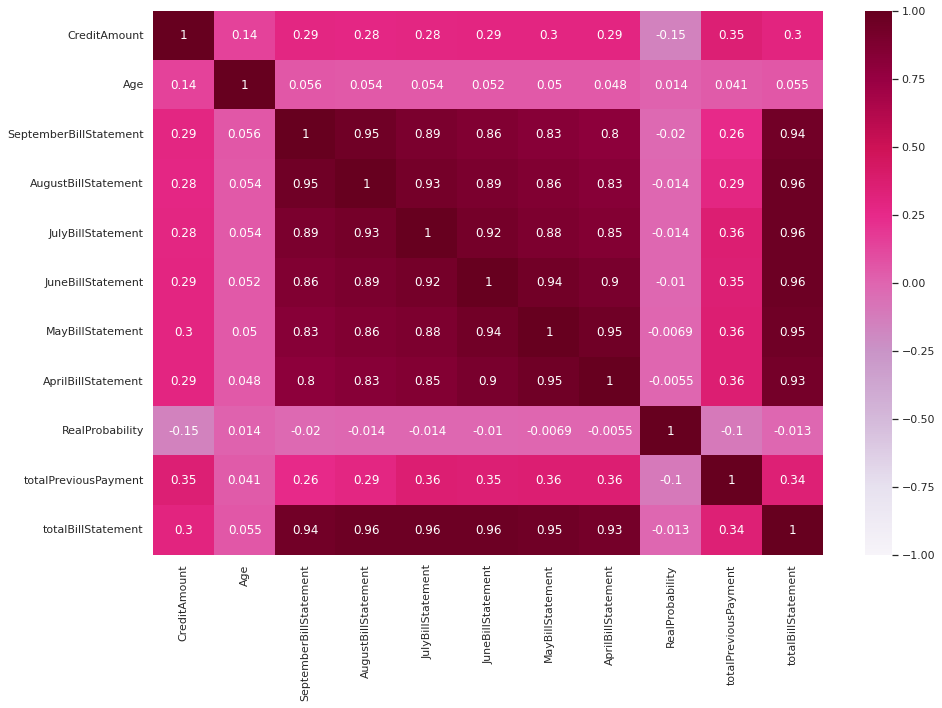

In [67]:
#librería para mejor visualización de la correlación
import seaborn as sea

#buscar correlación entre las variables numéricas
pay_cor= pay_clean.corr()
#mostrar mapa de calor para correlaciones (mientras mas oscuro, mas correlación positiva, mientras mas claro, mas correlación negativa)
sea.set(rc={'figure.figsize':(15,10)})
sea.heatmap(pay_cor,vmin=-1,vmax=1,cmap="PuRd",annot=True)

In [92]:
#variables a analizar para la varianza
vars_col = ["CreditAmount", "totalPreviousPayment", "totalBillStatement"]
#objeto con los datos estadísticos y valores de las columnas seleccionadas
obj = {
"Varianza": pay_clean[vars_col].var(),
"Valor mínimo": pay_clean[vars_col].min(),
"Valor máximo": pay_clean[vars_col].max()
}
#pasar información a dataframe para visualizarlo mejor
pd.DataFrame(obj, index=vars_col).transpose()

,CreditAmount,totalPreviousPayment,totalBillStatement
Varianza,1.683177e+10,3.703280e+09,1.442137e+11
Valor mínimo,1.000000e+04,0.000000e+00,-3.362590e+05
Valor máximo,1.000000e+06,3.764066e+06,5.263883e+06


In [87]:
#varianza total
v=pay_clean.var().sum()
v
#Varianza para variables elegidas
var_credit = pay_clean.CreditAmount.var()
var_prevpay = pay_clean.totalPreviousPayment.var()
var_billstate = pay_clean.totalBillStatement.var()

#porcentaje de varianza por variable de acuerdo al total
print('Varianza total \t\t:',v.round(2) )
print('Varianza de credit amount \t:', ((var_credit/v)*100).round(2),'%' )
print('Varianza de previous payment \t\t:', ((var_prevpay/v)*100).round(2),'%' )
print('Varianza de bill statement \t:', ((var_billstate/v)*100).round(2),'%' )

#podemos ver en los resultados que la columna de totalBillStatement representa el 75% de la varianza.

Varianza total 		: 191454837695.55
Varianza de credit amount 	: 8.79 %
Varianza de previous payment 		: 1.93 %
Varianza de bill statement 	: 75.33 %


In [88]:
#escalar datos nivelarlos y no se vean afectados al aplicar el PCA
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_pay = scalar.fit_transform(pay_clean)
#imprimir los primeros 10
scaled_pay[:10]

array([[-1.13736269, -1.24628151, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388,  1.87668918, -0.50912089,
        -0.69065526],
       [-0.36656147, -1.0292244 , -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248,  1.87668918, -0.4382787 ,
        -0.66597313],
       [-0.59780183, -0.16099598, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0.53285329, -0.33938557,
        -0.44325726],
       [-0.90612232,  0.16458968, -0.057797  , -0.01358648,  0.03255235,
        -0.23251237, -0.18692884, -0.15680815, -0.53285329, -0.38260407,
        -0.10176539],
       [-0.90612232,  2.33516075, -0.57864758, -0.6112971 , -0.16138262,
        -0.34708021, -0.34825998, -0.33162637, -0.53285329,  0.44990257,
        -0.42301754],
       [-0.90612232,  0.16458968,  0.17851522,  0.11049714,  0.15242133,
        -0.37109999, -0.3404836 , -0.3166386 , -0.53285329, -0.39272673,
        -0.083

In [90]:
#convertir información escalada en un dataframe para mostrar las variables originales
scaled_paydf=pd.DataFrame(scaled_pay,columns=pay_clean.columns)
scaled_paydf.head()

,CreditAmount,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,RealProbability,totalPreviousPayment,totalBillStatement
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,1.876689,-0.509121,-0.690655
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,1.876689,-0.438279,-0.665973
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.532853,-0.339386,-0.443257
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.532853,-0.382604,-0.101765
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.532853,0.449903,-0.423018


In [93]:
#volver a sacar varianza y valores minimos y maximos en dataframe escalado
#objeto con los datos estadísticos y valores de las columnas seleccionadas
obj_scaled = {
"Varianza": scaled_paydf[vars_col].var(),
"Valor mínimo": scaled_paydf[vars_col].min(),
"Valor máximo": scaled_paydf[vars_col].max()
}
#pasar información a dataframe para visualizarlo mejor
pd.DataFrame(obj_scaled, index=vars_col).transpose()

,CreditAmount,totalPreviousPayment,totalBillStatement
Varianza,1.000033,1.000033,1.000033
Valor mínimo,-1.214443,-0.520443,-1.596421
Valor máximo,6.416489,61.334040,13.150558


In [94]:
#librería para aplicar PCA
from sklearn.decomposition import PCA
#sacamos PCA
pca=PCA()
pca_v = pca.fit_transform(scaled_paydf)
#mostramos los primeros 10 valores
pca_v[:10]

array([[-2.01317232e+00, -1.96483214e+00,  1.48174255e-01,
         1.32566298e+00, -4.81274325e-02,  7.25485101e-02,
        -1.77385069e-02, -1.04962783e-02,  1.26564223e-04,
         2.33486271e-03,  1.94512161e-15],
       [-1.81911825e+00, -1.40773815e+00, -9.68717951e-02,
         1.47873146e+00, -5.12198920e-01, -1.93940124e-02,
         2.36961763e-02, -1.25787089e-03,  6.15794592e-03,
         6.58770545e-03,  7.73873721e-16],
       [-1.23794193e+00, -9.05519065e-02,  4.07239531e-01,
        -5.20455294e-01,  2.71883691e-01, -2.13793453e-02,
        -9.75877940e-02, -4.64162600e-02,  9.44515329e-02,
         4.81792951e-02,  3.10865980e-14],
       [-4.44071377e-01, -3.65111060e-01,  1.65877407e-01,
        -8.45111197e-01,  5.42099200e-01,  1.31937583e-01,
         1.70439537e-02,  1.45460529e-01, -2.04309013e-02,
         4.02564119e-02, -4.29091725e-15],
       [-1.01556024e+00,  8.41317052e-01, -1.62311683e+00,
        -9.97357348e-01,  1.60590128e+00, -1.06440845e-01,
  

In [99]:
#obtener varianza explicada por componente y la varianza acumulada
pcaObj_paydf = pd.DataFrame({
'Varianza explicada%': np.round(pca.explained_variance_ratio_,4) * 100,
'Varianza acumulada%': np.cumsum(pca.explained_variance_ratio_) * 100})
pcaObj_paydf


,Varianza explicada%,Varianza acumulada%
0,60.85,60.849314
1,11.40,72.244432
2,9.24,81.481122
3,7.78,89.257738
4,5.76,95.016655
5,2.65,97.666640
6,0.99,98.654606
7,0.60,99.255938
8,0.38,99.633407
9,0.37,100.000000


In [101]:
#añadimos nombres a las filas para un análisis mas sencillo 
pca_names = [f'Component{i + 1}' for i in range(len(scaled_paydf.columns))]
pcaObj_paydf.index = pca_names
pcaObj_paydf

,Varianza explicada%,Varianza acumulada%
Component1,60.85,60.849314
Component2,11.40,72.244432
Component3,9.24,81.481122
Component4,7.78,89.257738
Component5,5.76,95.016655
Component6,2.65,97.666640
Component7,0.99,98.654606
Component8,0.60,99.255938
Component9,0.38,99.633407
Component10,0.37,100.000000


In [98]:
#declaración de dataframe con pesos de componentes
pca_df = pd.DataFrame(pca_v, columns =pca_names)
#comparamos varianzas de variables y componentes
print("Varianza de variables originales: ", scaled_paydf.var().sum())
print("Varianza de componentes: ", pca_df.var().sum())

Varianza de variables originales:  11.000367192976597
Varianza de componentes:  11.000367192976608


In [102]:
#análisis para encontrar los componentes principales
pcaObj_paydf
#viendo la columna de varianza acumulada podemos concluir que nuestros componentes principales pueden ser de los primeros 4 a 5 componentes, ya que con 5 la variación se ve explicada en un 95%

,Varianza explicada%,Varianza acumulada%
Component1,60.85,60.849314
Component2,11.40,72.244432
Component3,9.24,81.481122
Component4,7.78,89.257738
Component5,5.76,95.016655
Component6,2.65,97.666640
Component7,0.99,98.654606
Component8,0.60,99.255938
Component9,0.38,99.633407
Component10,0.37,100.000000


In [104]:
#comparación con variables originales escaladas para alcanzar el 95% de variación
total =scaled_paydf.var().sum()
pd.DataFrame({
"Varianza %": (scaled_paydf.var()/ total) * 100,
"Varianza acumulada %": (scaled_paydf.var().cumsum() / total) *100
})
#podemos notar que sin sacar el PCA necesitaríamos utilizar 10/11 variables en vez de 5 para llegar a más del 90% de la variación explicada, se logró reducir a la mitad de factores

,Varianza %,Varianza acumulada %
CreditAmount,9.090909,9.090909
Age,9.090909,18.181818
SeptemberBillStatement,9.090909,27.272727
AugustBillStatement,9.090909,36.363636
JulyBillStatement,9.090909,45.454545
JuneBillStatement,9.090909,54.545455
MayBillStatement,9.090909,63.636364
AprilBillStatement,9.090909,72.727273
RealProbability,9.090909,81.818182
totalPreviousPayment,9.090909,90.909091


In [105]:
#analizamos la composición de los 5 componentes principales que contienen la mayoría de información
comp_paydf = pd.DataFrame(
pca.components_.round(2), 
columns = pca_df.columns, 
index = scaled_paydf.columns) 
comp_paydf.iloc[:,:5]

,Component1,Component2,Component3,Component4,Component5
CreditAmount,0.14,0.03,0.36,0.37,0.37
Age,0.61,0.29,-0.09,-0.10,-0.06
SeptemberBillStatement,-0.09,-0.86,-0.00,0.00,0.01
AugustBillStatement,0.24,-0.36,-0.12,-0.10,-0.03
JulyBillStatement,-0.74,0.23,-0.10,-0.05,0.03
JuneBillStatement,-0.04,-0.01,0.49,0.40,0.20
MayBillStatement,0.03,-0.00,-0.46,-0.13,0.59
AprilBillStatement,0.02,-0.00,-0.25,0.08,0.57
RealProbability,-0.01,-0.00,0.48,-0.69,0.17
totalPreviousPayment,-0.00,-0.00,0.25,-0.39,0.28


In [107]:
#obtener los valores máximo por componente en filas para analizar mejor la información
comp_paydf.iloc[:,:10].abs().idxmax()
#mostrando los 10 primeros componentes podemos ver que la misma variable puede ser la que más contribuya para distintos componentes, en este caso julybillstatement y junebillstatement son las que mas contribuyen en varios componentes

Component1          JulyBillStatement
Component2     SeptemberBillStatement
Component3          JuneBillStatement
Component4            RealProbability
Component5           MayBillStatement
Component6         AprilBillStatement
Component7       totalPreviousPayment
Component8          JuneBillStatement
Component9        AugustBillStatement
Component10         JulyBillStatement
dtype: object

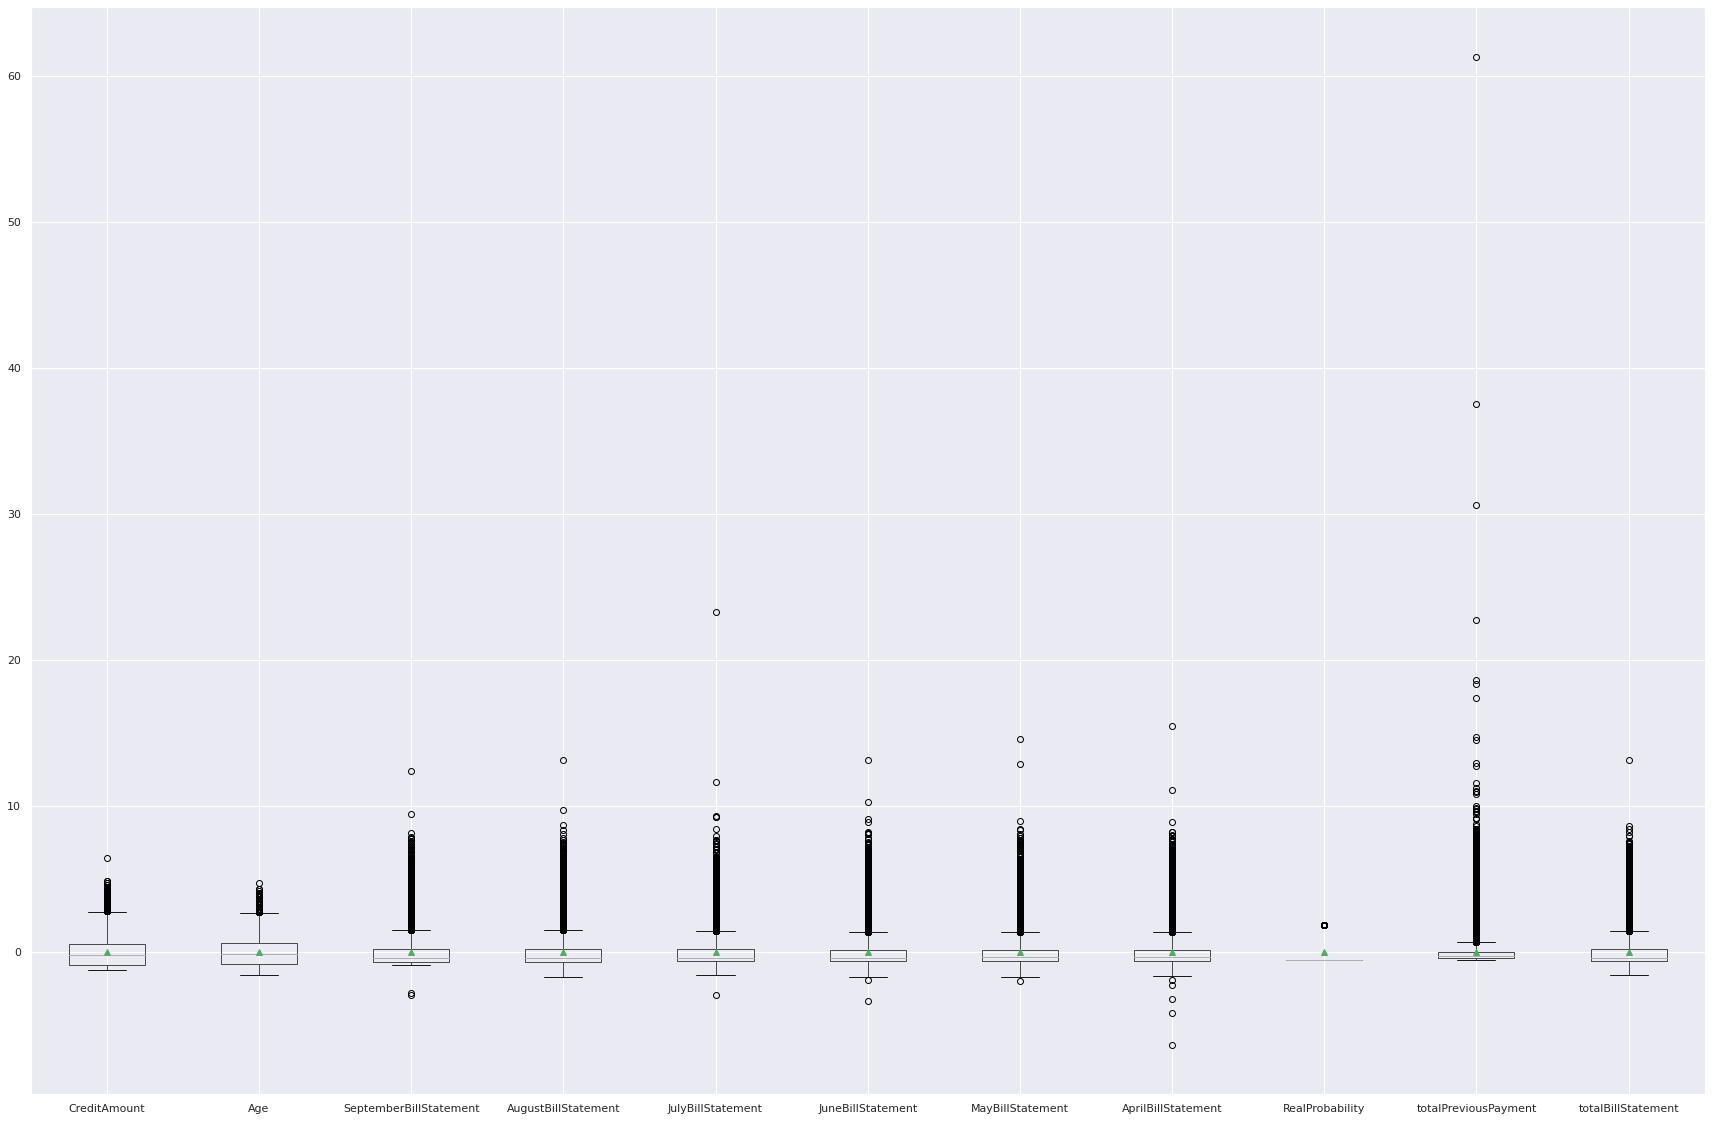

In [122]:
#librería para graficar
import matplotlib.pyplot as plt
#identificación de los valores atípicos
atp_val=scaled_paydf.boxplot(figsize=(30,20),showmeans=True)
atp_val.plot()
plt.show()

In [120]:
atp_df=scaled_paydf.copy()
#encontrar las regiones mediana, cuartil e intercuartil
q1 = atp_df.quantile(0.25)
q3 = atp_df.quantile(0.75)
iqr = q3 - q1
iqr

CreditAmount              1.464522
Age                       1.410871
SeptemberBillStatement    0.863683
AugustBillStatement       0.857235
JulyBillStatement         0.828983
JuneBillStatement         0.811386
MayBillStatement          0.796685
AprilBillStatement        0.805257
RealProbability           0.000000
totalPreviousPayment      0.441704
totalBillStatement        0.826970
dtype: float64

In [123]:
#obtener el bigote inferior
bi = (q1 - 1.5 * iqr)
bi

CreditAmount             -3.102906
Age                      -2.928474
SeptemberBillStatement   -1.942823
AugustBillStatement      -1.934869
JulyBillStatement        -1.882925
JuneBillStatement        -1.853337
MayBillStatement         -1.829085
AprilBillStatement       -1.839520
RealProbability          -0.532853
totalPreviousPayment     -1.073182
totalBillStatement       -1.875866
dtype: float64

In [124]:
#obtener el bigote superior
bs = (q3 + 1.5 * iqr)
bs

CreditAmount              2.755183
Age                       2.715011
SeptemberBillStatement    1.511910
AugustBillStatement       1.494071
JulyBillStatement         1.433009
JuneBillStatement         1.392208
MayBillStatement          1.357653
AprilBillStatement        1.381510
RealProbability          -0.532853
totalPreviousPayment      0.693633
totalBillStatement        1.432013
dtype: float64

In [125]:
#comprobamos si existen outliers
outliers = (atp_df < bi) | (atp_df > bs)

outliers

,CreditAmount,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,RealProbability,totalPreviousPayment,totalBillStatement
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
29953,False,False,True,True,True,False,False,False,False,False,False
29954,False,False,False,False,False,False,False,False,False,False,False
29955,False,False,False,False,False,False,False,False,True,False,False
29956,False,False,False,False,False,False,False,False,True,True,False


In [126]:
outl=atp_df[outliers]
outl

,CreditAmount,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,RealProbability,totalPreviousPayment,totalBillStatement
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.876689,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.876689,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29953,NaN,NaN,1.86905,2.016773,2.325211,NaN,NaN,NaN,NaN,NaN,NaN
29954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.876689,NaN,NaN
29956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.876689,1.898166,NaN


In [127]:
#nuevo dataframe sin outliers
wo_outliers=(atp_df>=bi)&(atp_df<=bs)
del_outliers=atp_df[wo_outliers]
del_outliers

,CreditAmount,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,RealProbability,totalPreviousPayment,totalBillStatement
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,NaN,-0.509121,-0.690655
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,NaN,-0.438279,-0.665973
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.532853,-0.339386,-0.443257
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.532853,-0.382604,-0.101765
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.532853,0.449903,-0.423018
...,...,...,...,...,...,...,...,...,...,...,...
29953,0.404240,0.381647,NaN,NaN,NaN,0.694875,-0.149477,-0.384512,-0.532853,0.178776,1.199135
29954,-0.135321,0.815761,-0.672765,-0.665250,-0.627383,-0.532915,-0.577704,-0.652714,-0.532853,-0.282331,-0.655163
29955,-1.060283,0.164590,-0.647220,-0.643793,-0.638106,-0.348043,-0.324651,-0.327833,NaN,-0.006094,-0.525304
29956,-0.674882,0.598704,-0.717937,0.409753,0.421878,0.147516,-0.468128,0.168744,NaN,NaN,-0.008870


In [128]:
#eliminamos NaN del dataframe
del_outliers.dropna()

,CreditAmount,Age,SeptemberBillStatement,AugustBillStatement,JulyBillStatement,JuneBillStatement,MayBillStatement,AprilBillStatement,RealProbability,totalPreviousPayment,totalBillStatement
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.532853,-0.339386,-0.443257
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.532853,-0.382604,-0.101765
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.532853,0.449903,-0.423018
5,-0.906122,0.164590,0.178515,0.110497,0.152421,-0.371100,-0.340484,-0.316639,-0.532853,-0.392727,-0.083911
7,-0.520722,-1.354810,-0.534412,-0.685584,-0.669194,-0.668986,-0.665645,-0.643198,-0.532853,-0.441713,-0.675429
...,...,...,...,...,...,...,...,...,...,...,...
29943,0.558400,-0.595110,-0.695609,-0.690921,-0.677856,-0.672419,-0.663031,-0.652714,-0.532853,-0.520443,-0.710942
29944,1.483361,-0.052467,-0.665476,-0.690921,-0.677856,-0.672419,-0.663031,-0.652714,-0.532853,-0.520443,-0.705096
29947,-0.135321,-0.052467,-0.649120,-0.564408,-0.677899,-0.660301,-0.663031,-0.652714,-0.532853,-0.358793,-0.676154
29950,-1.214443,0.815761,-0.576137,-0.544874,-0.677856,-0.672419,-0.663031,-0.652714,-0.532853,-0.487577,-0.660377


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


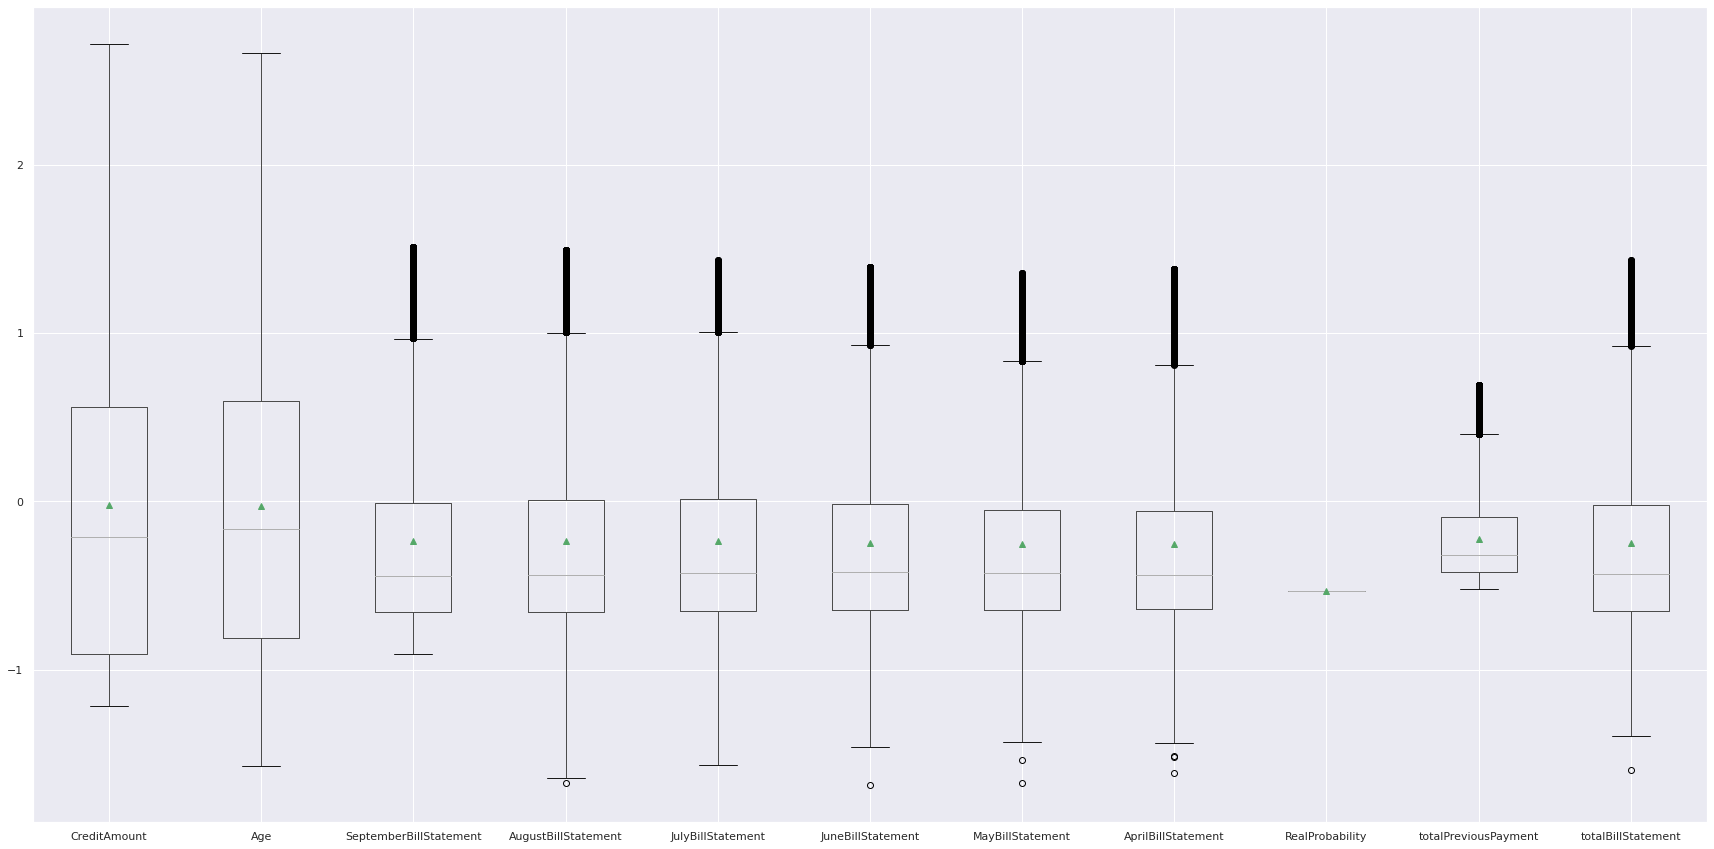

In [131]:
#aplicamos boxplot al nuevo dataframe
val_atp = del_outliers.boxplot(figsize = (30,15),showmeans = True)
val_atp.plot()
plt.show()
#podemos notal que al haber utilizado un método mas sencillo, aun permanecer algunos valores atípicos